📊Project 1: Exploratory Data Analysis (EDA) on Retail Sales Data

👤 Created by: Neha Tiwari

🎯 Objective: To uncover sales trends, customer behavior, and actionable insights using EDA.


1. Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Inline plots for Jupyter
%matplotlib inline



2. Load the Dataset

In [3]:
# Load the datasets
df = pd.read_csv("retail_sales_dataset.csv")

# Preview the dataset
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


3. Data Cleaning and Preprocessing

In [12]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Convert 'Order Date' or similar to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Recheck after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID 

4. Descriptive Statistics

In [13]:
# Summary statistics for numeric columns
print("\nDescriptive Statistics:\n", df.describe())

# Central tendency measures for 'Total Amount'
print("\nMean Total Amount:", df['Total Amount'].mean())
print("Median Total Amount:", df['Total Amount'].median())
print("Mode Total Amount:", df['Total Amount'].mode()[0])
print("Standard Deviation Total Amount:", df['Total Amount'].std())



Descriptive Statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.0

5. Time Series Analysis — Sales Trends Over Time


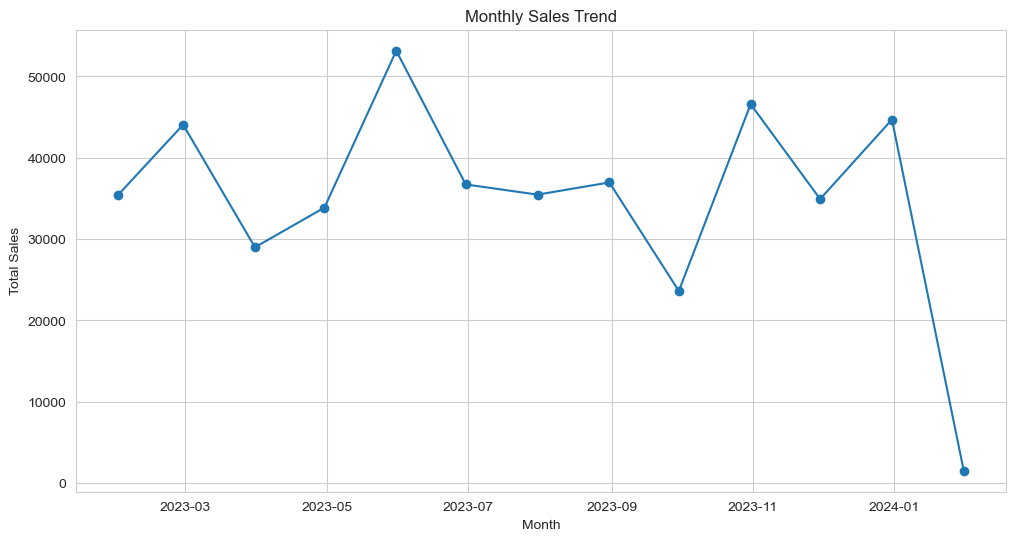

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Aggregate total sales by month
monthly_sales = df['Total Amount'].resample('M').sum()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


4. Customer and Product Analysis

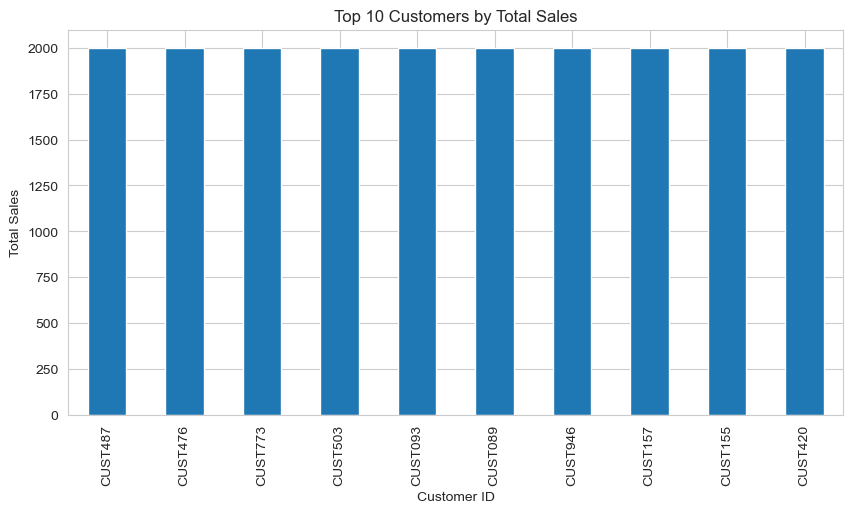

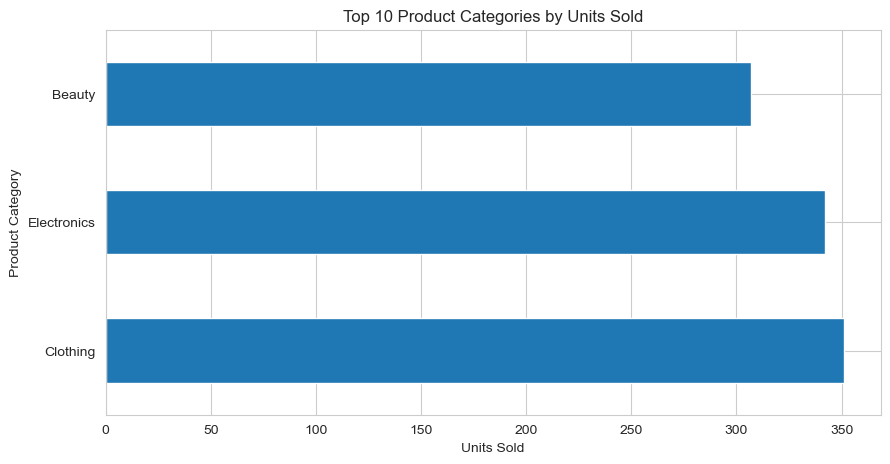

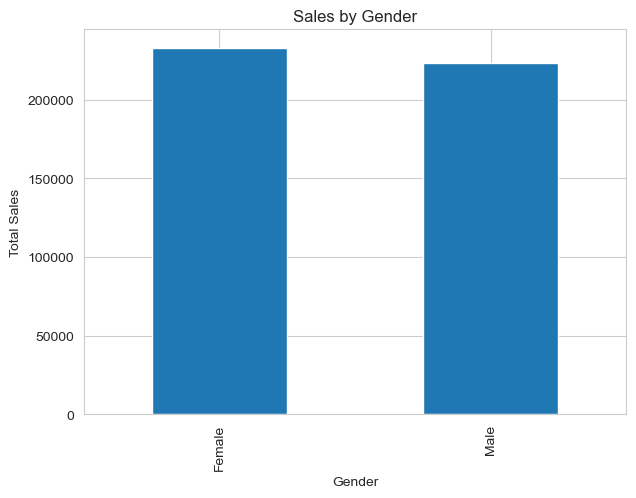

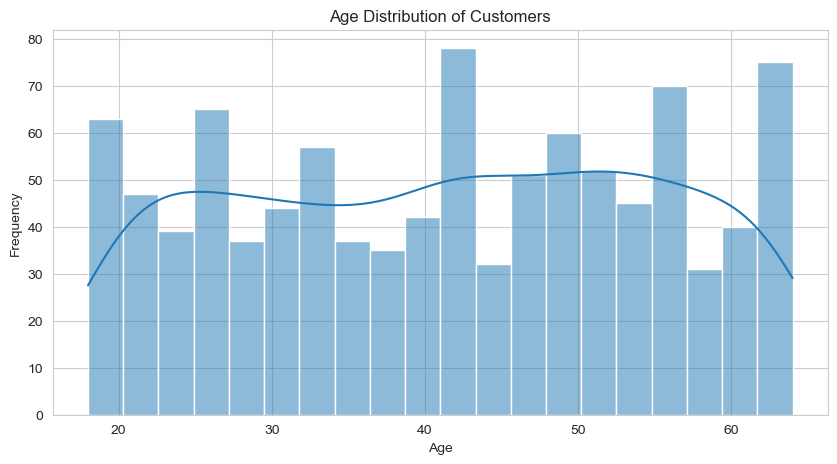

In [33]:
# Top 10 Customers by Total Sales
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Customer ID")
plt.show()

# Top Product Categories by Units Sold
top_products = df['Product Category'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='barh')
plt.title("Top 10 Product Categories by Units Sold")
plt.xlabel("Units Sold")
plt.show()

# Sales by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(7,5))
gender_sales.plot(kind='bar')
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.show()

# Age Distribution of Customers
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


5. Visualization - Correlation Heatmap

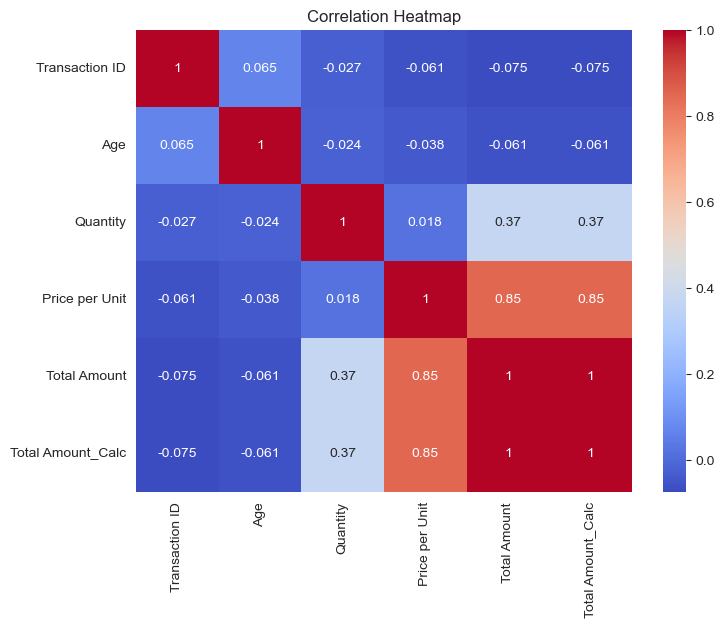

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 📊 Recommendations Based on Exploratory Data Analysis (EDA)

Below are data-driven recommendations derived from the retail sales dataset. These suggestions can help improve sales performance, customer engagement, and overall business efficiency.

---

### 1. Customer Segmentation & Personalization
- Segment customers based on **age** and **gender** to tailor marketing strategies.
- Consider personalized promotions for **females in the 35–45 years age group**, as this segment shows the highest purchase activity. *(Adjust this based on your findings if needed.)*

---

### 2. Product Category Performance
- Focus marketing and inventory planning on high-performing categories such as **Clothing**. 
- Reevaluate pricing, placement, or promotion strategies for underperforming categories like **Beauty**. 

---

### 3. Sales Trends & Seasonality
- Peak sales were observed in **June** and **November**, indicating good times for major campaigns.
- Off-peak months like **April** and **October** may benefit from special discounts, combo offers, or flash sales.


---

### 4. Pricing & Revenue Optimization
- Validate pricing alignment with customer behavior; ensure value matches perception.
- Confirmed that `Total Amount` = `Quantity × Price per Unit` — ✅ *(Already verified in analysis.)*
- Analyze price sensitivity for popular SKUs to test opportunities for dynamic pricing.

---

### 5. Improve Repeat Purchases
- Introduce loyalty programs to retain frequent shoppers and increase customer lifetime value.
- Reward top customers with personalized offers. Example top customers from dataset:
  - **CUST487, CUST476, CUST773, CUST503, CUST093, CUST089, CUST946, CUST157, CUST155, CUST420**

---

### 6. Data Enrichment & Cleaning
- Maintain ongoing checks for missing values, anomalies, and duplicates.
- Consider adding columns like **Region**, **Sales Channel**, or **Customer Segment** in future datasets for deeper analysis.

---
